In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import plotly.express as px
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

1.Zadanie

In [2]:
wine = load_wine()
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

features = list (df.iloc[:,:-1].columns)
scaler = StandardScaler()
df_features_std = scaler.fit_transform(df[features])

In [3]:
n_components = [2 ,4, 6, 8, 9, 10]
explained_variance_ratio = {}
d = {}

for n in n_components:
  pca = PCA(n_components=n, whiten=True)
  components = pca.fit_transform(df_features_std)
  explained_variance_ratio[n] = pca.explained_variance_ratio_
  d[n] = max (np.cumsum(pca.explained_variance_ratio_))


In [4]:
d

{2: 0.5540633835693534,
 4: 0.735989990758993,
 6: 0.8509811607477046,
 8: 0.9201754434577263,
 9: 0.9423969775056233,
 10: 0.9616971684450641}

In [5]:
pca = PCA()
pca.fit(df_features_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.95) + 1

In [6]:
d

10

2.Zadanie

In [7]:
rows_num = pd.read_csv('/content/drive/MyDrive/train_data.csv', nrows = 1)
features = []
col_num = len(rows_num.columns)

features = ['feature_' + str(n) for n in range (0, col_num)]

X = pd.read_csv('/content/drive/MyDrive/train_data.csv', names = features)
y = pd.read_csv('/content/drive/MyDrive/train_labels.csv', names = ['target'])

X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_9990,feature_9991,feature_9992,feature_9993,feature_9994,feature_9995,feature_9996,feature_9997,feature_9998,feature_9999
0,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
1,54.047,90.087,-154.747,-4116.486,38365.133,-589.309,1115.367,274.199,814.953,167.272,...,-176.341,-426.238,-542.428,99.147,-102.309,-277.948,-98.859,-1163.779,265.231,-992.056
2,272.168,-201.736,4212.592,-9123.655,-35422.458,-1029.249,-506.290,-476.856,-570.731,-161.288,...,321.426,-376.033,142.834,920.958,-122.525,-174.304,-137.612,-1571.473,678.323,1020.263
3,170.007,68.736,48662.079,29735.235,-13903.955,895.081,-257.748,-811.058,-691.561,-31.439,...,-409.919,400.946,313.270,123.172,1786.962,147.637,31.433,-784.719,573.433,1454.415
4,86.797,180.052,-49643.545,2515.406,26206.315,-407.453,-189.416,-53.664,-159.507,-42.291,...,-101.761,-424.898,37.254,-337.431,423.691,14.240,267.352,-234.560,-213.804,873.391


In [8]:
X_embedded = TSNE().fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


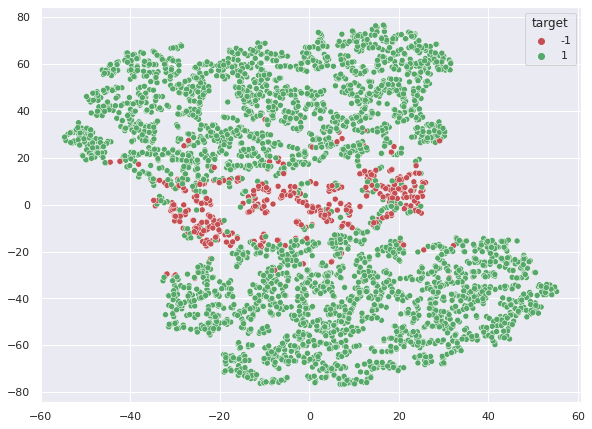

In [9]:
sns.set(rc={'figure.figsize':(9.7,7.27)})

sns.scatterplot(X_embedded[:,0]
               , X_embedded[:,1]
               , hue=y["target"]
               , palette = ['r', 'g'])

In [10]:
pca_tsne = Pipeline(steps = [
    ("pca", PCA(n_components=0.95, random_state=42)),
     ("tsne", TSNE(n_components=2, random_state=2))])

In [11]:
PCA_TSNE_EMBEDED = pca_tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


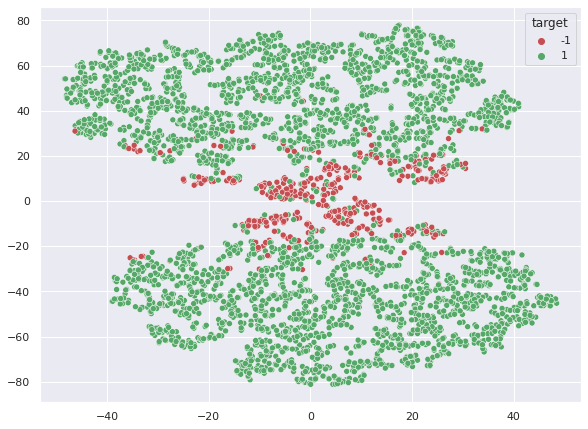

In [12]:
sns.set(rc={'figure.figsize':(9.7,7.27)})

sns.scatterplot(PCA_TSNE_EMBEDED[:,0]
               , PCA_TSNE_EMBEDED[:,1]
               , hue=y["target"]
               , palette = ['r', 'g'])

3.Zadanie

In [13]:
kpca = KernelPCA()
kpca_embeded = kpca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


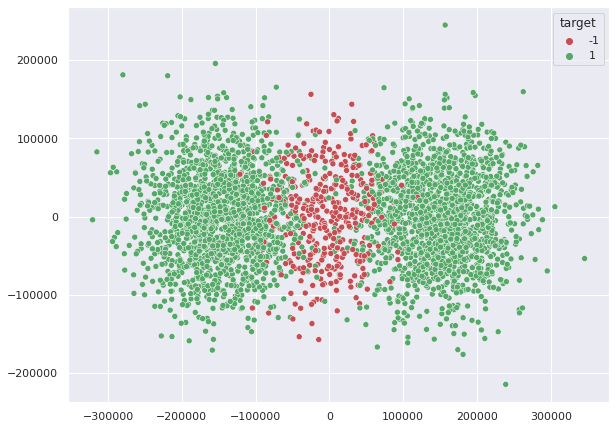

In [14]:
sns.set(rc={'figure.figsize':(9.7,7.27)})

sns.scatterplot(kpca_embeded[:,0]
               , kpca_embeded[:,1]
               , hue=y["target"]
               , palette = ['r', 'g'])

In [22]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 2),
        "kpca__kernel": [
                         "linear", 
                         "poly", 
                         "rbf",
                         #"sigmoid", 
                         "cosine"
                         "precomputed"
                         ]
    }]

grid_search = GridSearchCV(clf, param_grid, cv = 3, verbose = 1, n_jobs= -2)
grid_search.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-2,
             param_grid=[{'kpca__gamma': array([0.03, 0.05]),
                          'kpca__kernel': ['linear', 'poly', 'rbf',
                                           'cosineprecomputed']}],
             verbose=1)

In [23]:
#best kernell and gamma
grid_search.best_score_, grid_search.best_params_

(0.9, {'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'})